In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Milling_Data.csv")

In [3]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [4]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [6]:
data.drop(['Product ID', 'UDI','Failure Type'], axis=1, inplace = True)

In [7]:
print(data.columns)

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')


In [8]:
data['Power'] = data[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)

In [9]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Power
0,M,298.1,308.6,1551,42.8,0,0,66382.8
1,L,298.2,308.7,1408,46.3,3,0,65190.4
2,L,298.1,308.5,1498,49.4,5,0,74001.2
3,L,298.2,308.6,1433,39.5,7,0,56603.5
4,L,298.2,308.7,1408,40.0,9,0,56320.0


In [10]:
data['Type'].replace('L', 0, inplace=True)
data['Type'].replace('M', 1, inplace=True)
data['Type'].replace('H', 2, inplace=True)

In [11]:
for column in data.columns:
    data[column] = data[column].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  float64
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  float64
 6   Target                   10000 non-null  float64
 7   Power                    10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [13]:
data.nunique()

Type                          3
Air temperature [K]          93
Process temperature [K]      82
Rotational speed [rpm]      941
Torque [Nm]                 577
Tool wear [min]             246
Target                        2
Power                      9144
dtype: int64

In [14]:
data.isnull().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Power                      0
dtype: int64

In [15]:
(data.isnull().sum()/(len(data)))*100

Type                       0.0
Air temperature [K]        0.0
Process temperature [K]    0.0
Rotational speed [rpm]     0.0
Torque [Nm]                0.0
Tool wear [min]            0.0
Target                     0.0
Power                      0.0
dtype: float64

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,10000.0,0.50030,0.671301,0.0,0.0,0.0,1.00,2.0
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.50,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.10,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.00,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.80,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.00,253.0
Target,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.00,1.0
Power,10000.0,59967.14704,10193.093881,10966.8,53105.4,59883.9,66873.75,99980.4


In [17]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index([], dtype='object')
Numerical Variables:
['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target', 'Power']


Type
Skew : 0.99


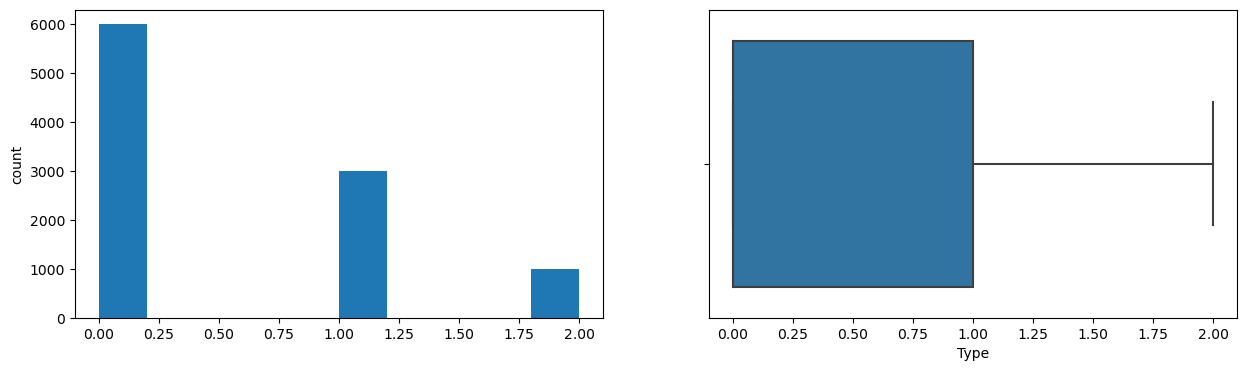

Air temperature [K]
Skew : 0.11


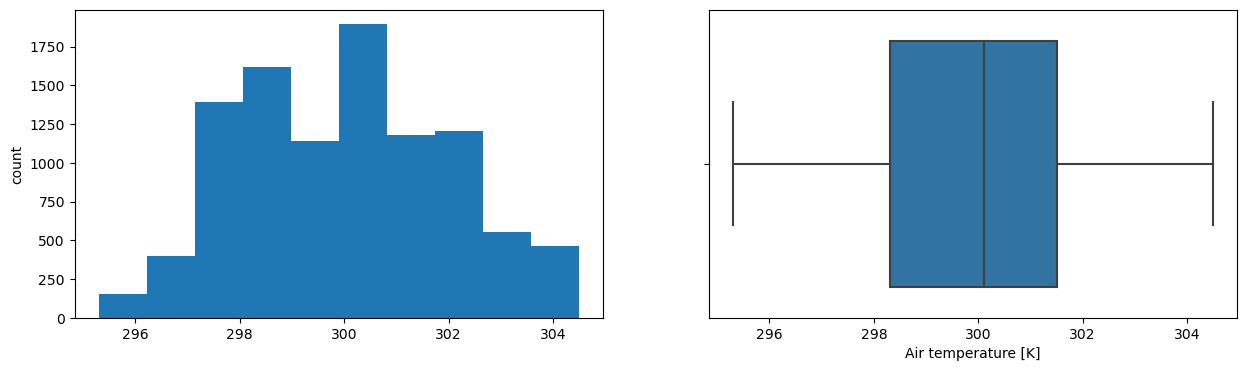

Process temperature [K]
Skew : 0.02


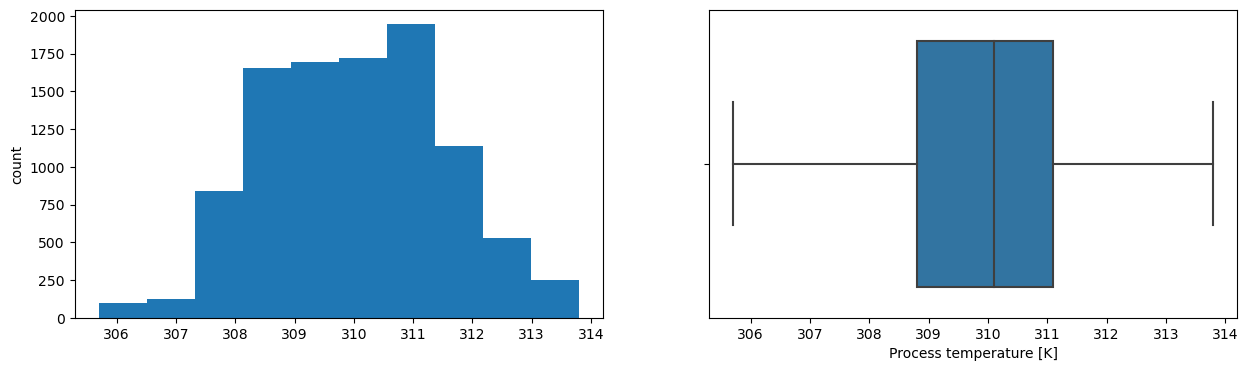

Rotational speed [rpm]
Skew : 1.99


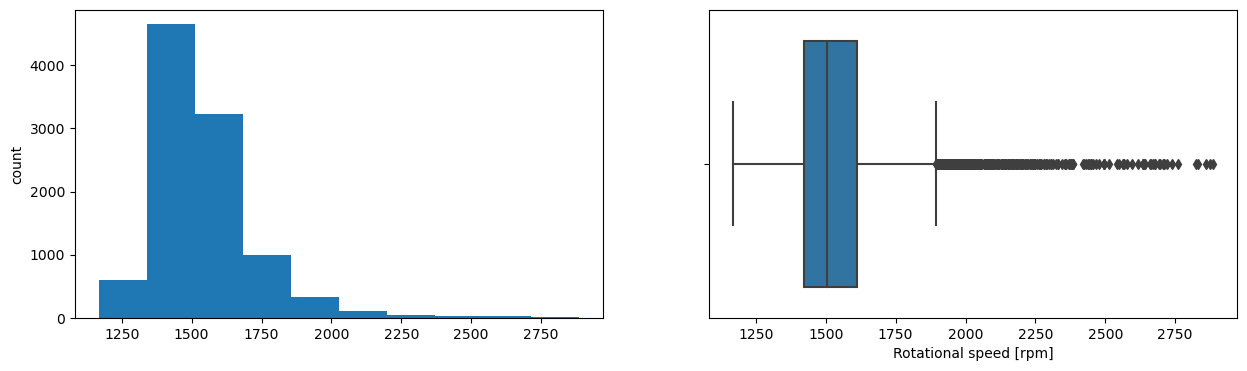

Torque [Nm]
Skew : -0.01


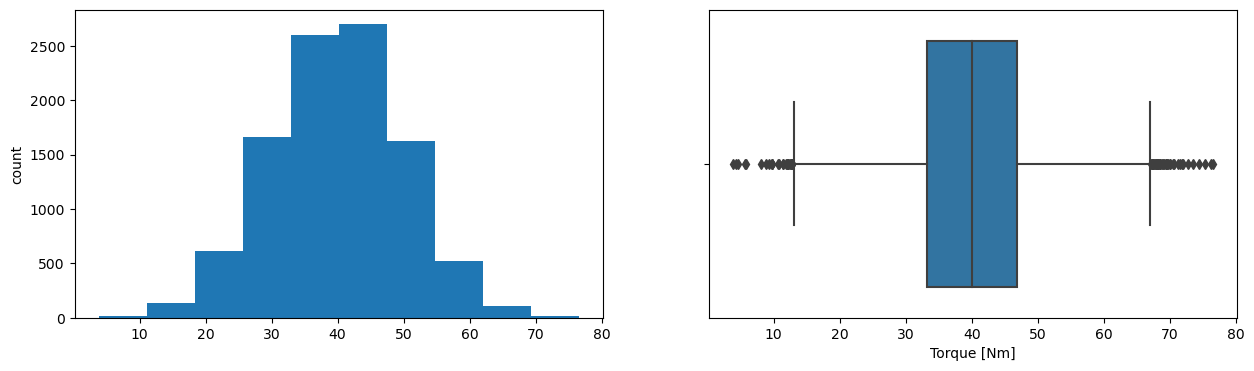

Tool wear [min]
Skew : 0.03


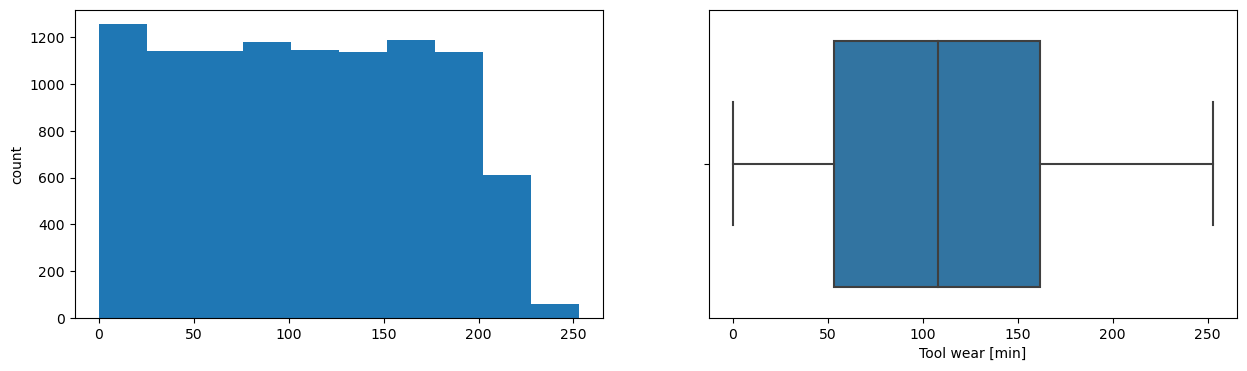

Target
Skew : 5.15


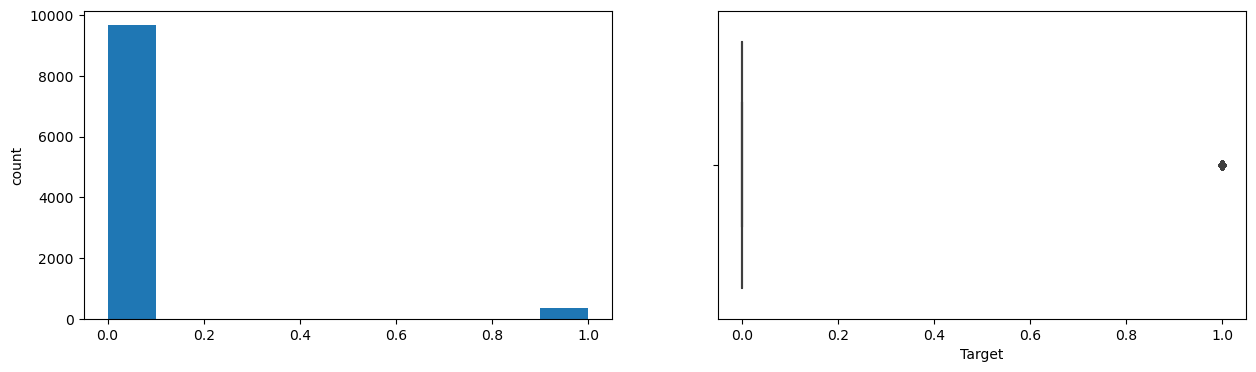

Power
Skew : 0.01


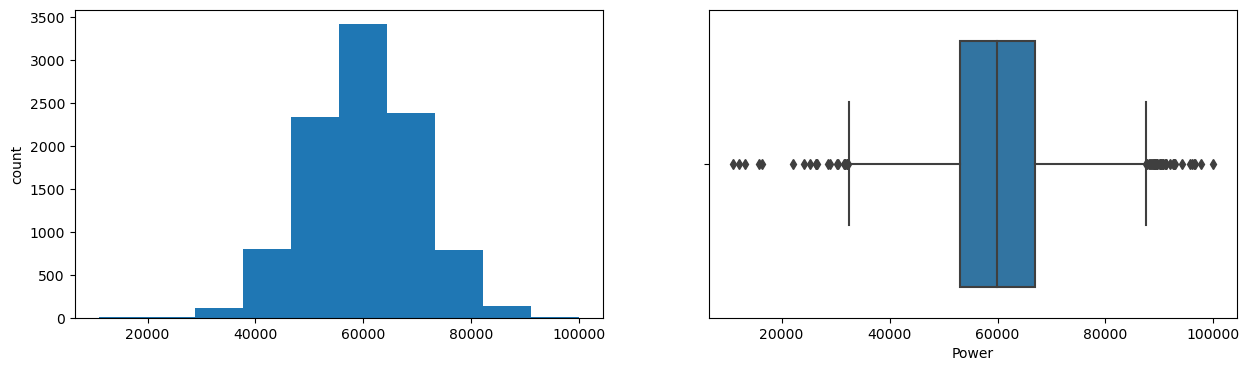

In [18]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

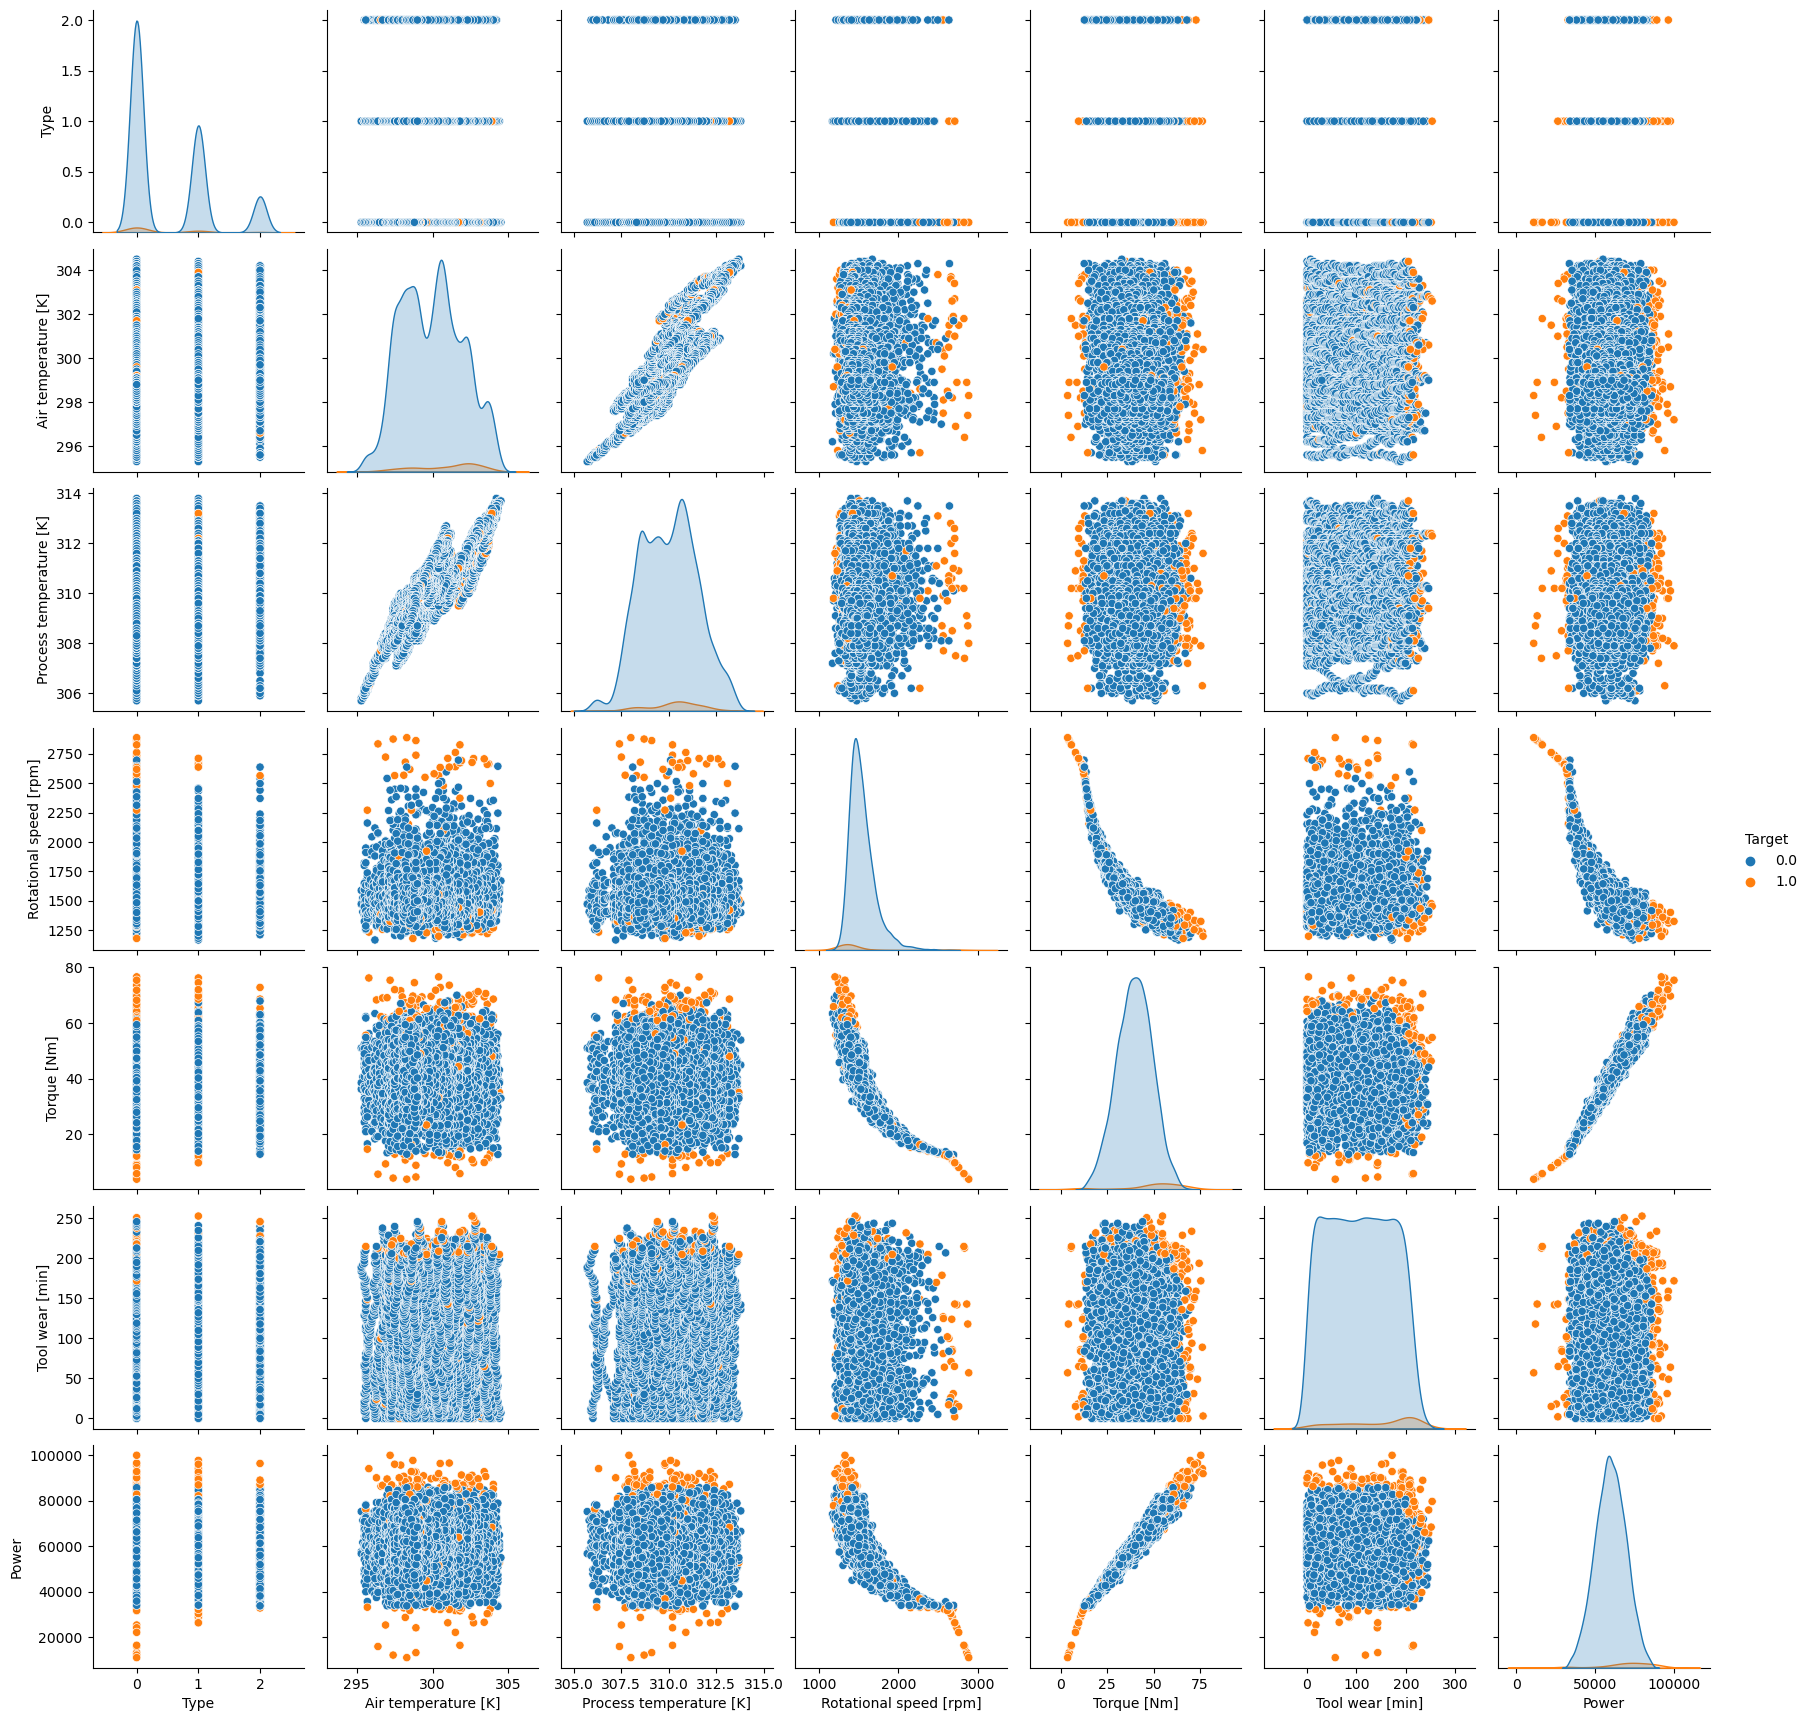

In [19]:
sns.pairplot(data,hue='Target')

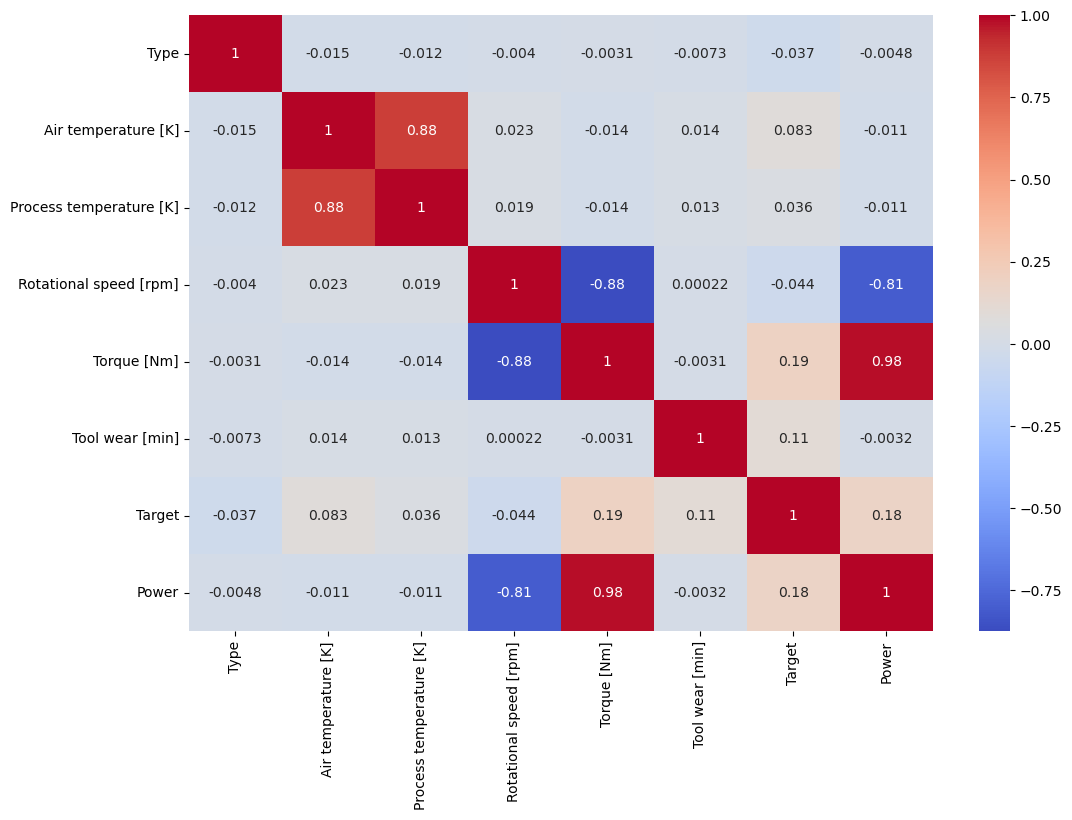

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
excluded_columns = ['Type','Target']

In [22]:
excluded_columns

['Type', 'Target']

In [23]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (data < lower_bound) | (data > upper_bound)

for column in data.columns:
    if column not in excluded_columns:
        data.loc[outliers[column], column] = data[column].median()

In [24]:
data.nunique()

Type                          3
Air temperature [K]          93
Process temperature [K]      82
Rotational speed [rpm]      667
Torque [Nm]                 526
Tool wear [min]             246
Target                        2
Power                      9085
dtype: int64

In [25]:
data.tail()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Power
9995,1.0,298.8,308.4,1604.0,29.5,14.0,0.0,47318.0
9996,2.0,298.9,308.4,1632.0,31.8,17.0,0.0,51897.6
9997,1.0,299.0,308.6,1645.0,33.4,22.0,0.0,54943.0
9998,2.0,299.0,308.7,1408.0,48.5,25.0,0.0,68288.0
9999,1.0,299.0,308.7,1500.0,40.2,30.0,0.0,60300.0


Type
Skew : 0.99


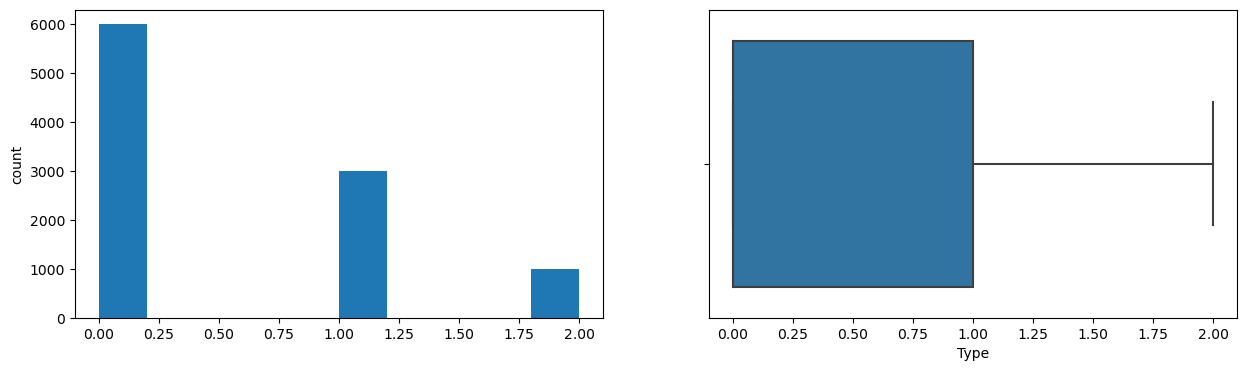

Air temperature [K]
Skew : 0.11


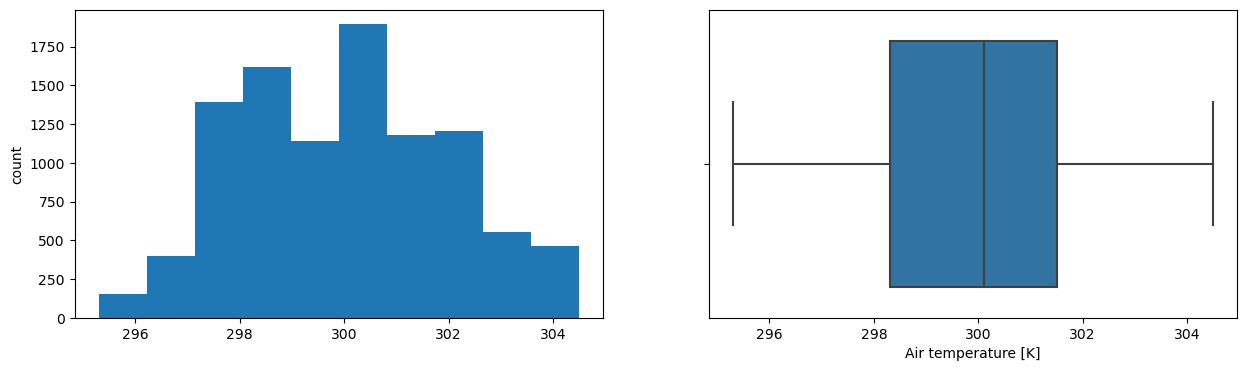

Process temperature [K]
Skew : 0.02


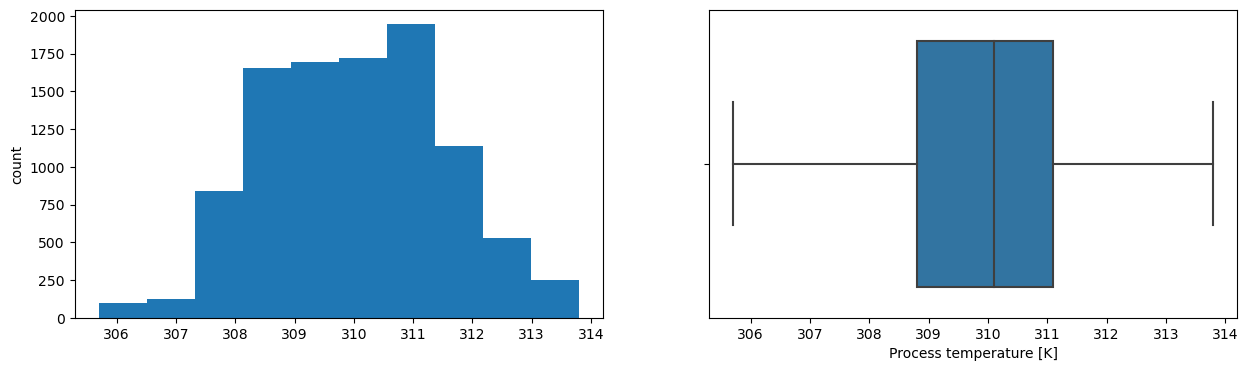

Rotational speed [rpm]
Skew : 0.59


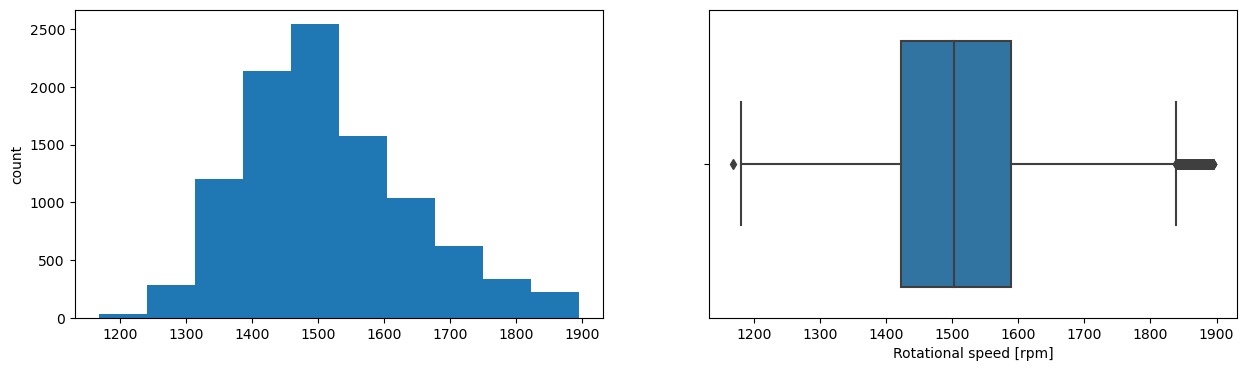

Torque [Nm]
Skew : -0.04


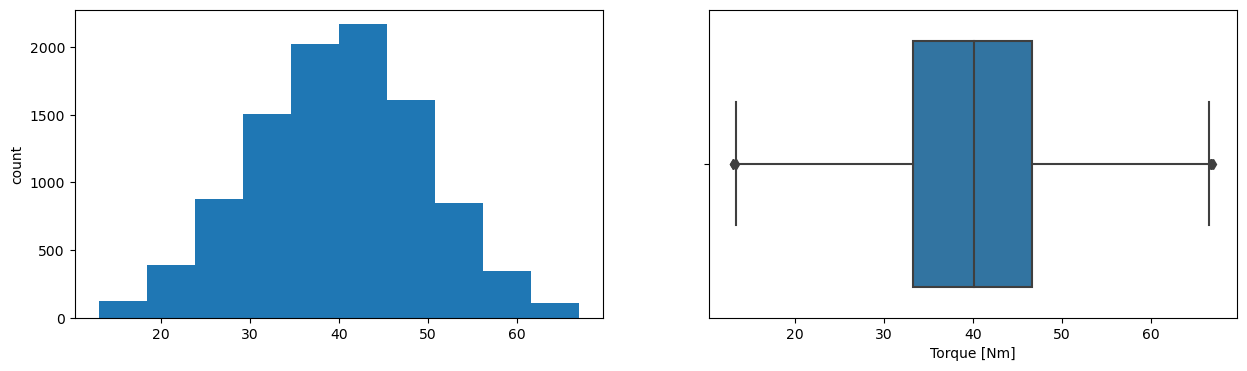

Tool wear [min]
Skew : 0.03


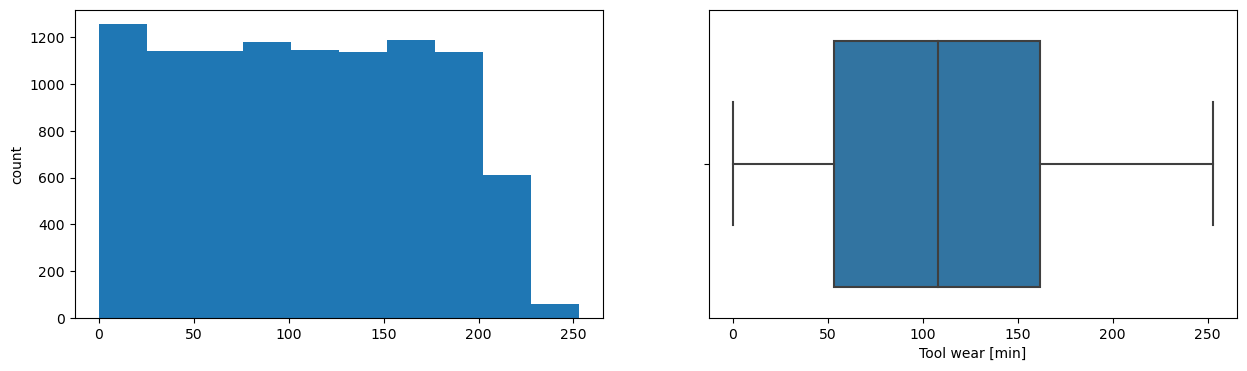

Target
Skew : 5.15


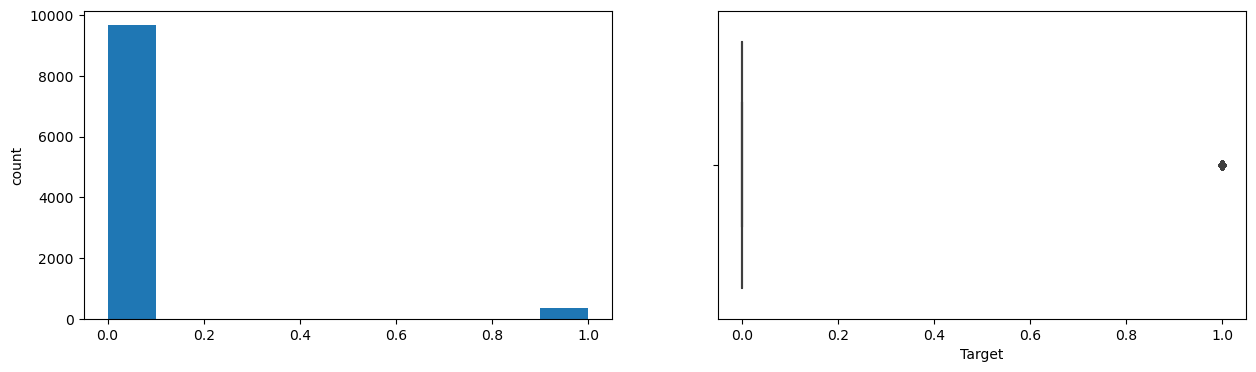

Power
Skew : 0.0


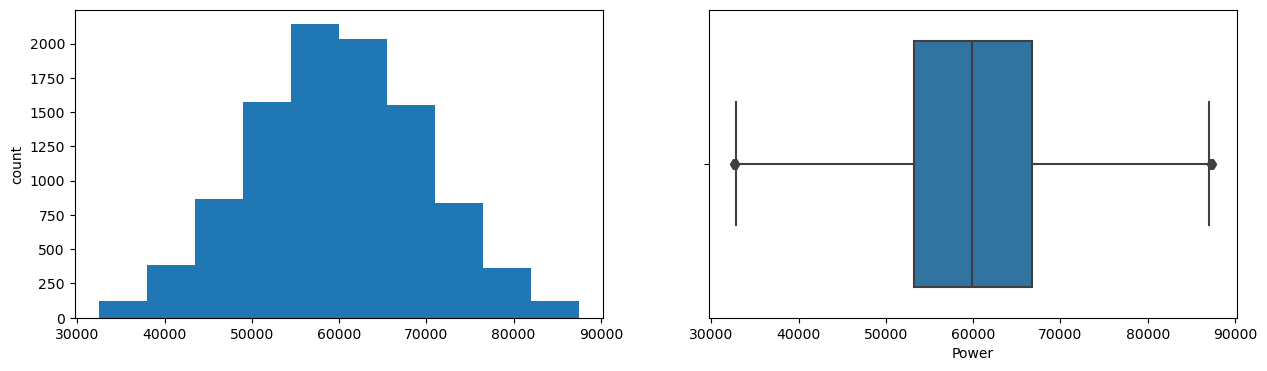

In [26]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

In [27]:
from scipy.stats import zscore


for column in data.columns:
      if column not in excluded_columns:
        data[column] = zscore(data[column])

In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,10000.0,5.003000e-01,0.671301,0.000000,0.000000,0.000000,1.000000,2.000000
Air temperature [K],10000.0,6.965539e-17,1.000050,-2.352278,-0.852397,0.047531,0.747476,2.247357
Process temperature [K],10000.0,3.841483e-15,1.000050,-2.901986,-0.812558,0.063653,0.737662,2.557486
Rotational speed [rpm],10000.0,-7.948517e-16,1.000050,-2.706297,-0.710249,-0.084038,0.589140,2.984397
Torque [Nm],10000.0,2.350273e-16,1.000050,-2.791721,-0.688774,0.015661,0.689019,2.802325
Tool wear [min],10000.0,4.147793e-17,1.000050,-1.695984,-0.863318,0.000770,0.849147,2.278819
Target,10000.0,3.390000e-02,0.180981,0.000000,0.000000,0.000000,0.000000,1.000000
Power,10000.0,9.925255e-17,1.000050,-2.782015,-0.682725,-0.003456,0.690898,2.795571


In [29]:
data.nunique()

Type                          3
Air temperature [K]          93
Process temperature [K]      82
Rotational speed [rpm]      667
Torque [Nm]                 526
Tool wear [min]             246
Target                        2
Power                      9085
dtype: int64

In [30]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Power
0,1.0,-0.952389,-0.947360,0.291689,0.295364,-1.695984,0.0,0.655030
1,0.0,-0.902393,-0.879959,-0.827663,0.657941,-1.648852,0.0,0.534213
2,0.0,-0.952389,-1.014761,-0.123176,0.979080,-1.617430,0.0,1.426946
3,0.0,-0.902393,-0.947360,-0.631972,-0.046495,-1.586009,0.0,-0.335834
4,0.0,-0.902393,-0.879959,-0.827663,0.005302,-1.554588,0.0,-0.364559


In [36]:
y = data.iloc[:, -2].values

In [41]:
X = data.iloc[:, [1,2,4]].values

In [42]:
#CLASSIFICATION USING SVM
from sklearn import svm
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\nThe confusion Matrix is : \n',confusion_matrix)
from sklearn.metrics import classification_report
print('\nThe evaluation parameters are : \n',classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set: 0.97

The confusion Matrix is : 
 [[2901    0]
 [  99    0]]

The evaluation parameters are : 
               precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      2901
         1.0       0.00      0.00      0.00        99

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.94      0.97      0.95      3000

